# Week 8 Study Notebook

# UC San Diego OMDS DSC 207

## Imports

In [1]:
#LOAD LIBRARIES
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import metrics
import pandas as pd
import numpy as np

# Part 1: Clustering

#### 1.1 For our KMeans clustering task, read only the following columns into a dataframe `X` using the following link: https://gist.githubusercontent.com/netj/8836201/raw/.

1. "sepal.length"
2. "sepal.width"
3. "petal.length"
4. "petal.width"

Print the head() of `X`. [1 pt]

In [2]:
X = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/", usecols=['sepal.length', 'sepal.width', 'petal.length', 'petal.width'])
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### 1.2 Defining the model

Import and define a model using <a href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html'>sklearn.cluster.kmeans</a> [0.5 pt].<br>
**Pick any value for the number of clusters for now.**<br>


In [3]:
kmeans = cluster.KMeans(4)

#### 1.3 [Fit and predict](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit_predict) the kmeans model on `X`. Print the predicted values. [0.5 pt]

In [4]:
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 2 2 2 2 3 2 2 2 2 2 2 2 2 1 3 1 3 1 1 2 1 1 1 3
 3 1 3 3 3 3 1 1 3 1 3 1 3 1 1 3 3 3 1 1 1 3 3 3 1 1 3 3 1 1 3 3 1 1 3 3 3
 3 3]


#### 1.4 Print the center points of the clusters that the model created. (Hint - look into the documentation to see how we can easily find it) [0.5 pt]

In [5]:
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [7.08695652, 3.12608696, 6.01304348, 2.14347826],
       [5.58      , 2.63333333, 3.98666667, 1.23333333],
       [6.29361702, 2.9       , 4.95106383, 1.72978723]])

#### 1.5 Find and print the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) of the the data using the current model. [0.5 pt]

In [6]:
metrics.silhouette_score(X, y_kmeans)

0.49535632852885064

<!-- END QUESTION -->

### Visualization

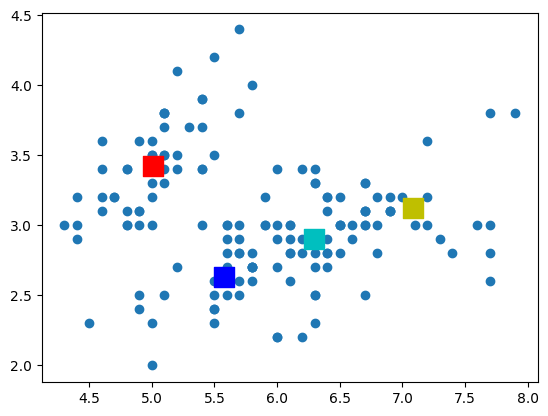

In [7]:
# Run this cell to see clusters being formed for pairs of features. Make sure to have as many colors as k and you have used similar naming of variables (update the cell below if not).
plt.scatter(data=X, x='sepal.length', y='sepal.width')
colors = ['r', 'y', 'b', 'c', 'm', 'g', 'k', 'w','orange']
for i, coor in enumerate(kmeans.cluster_centers_):
  plt.scatter(coor[0], coor[1], s=200, c=colors[i], marker='s')
plt.show()

### Experimentation

We chose an arbitrary value of k for the above experiment. In the lecture videos, we saw that elbow method is one of the ways to make a better guess for the value of k, although not always useful.

In [8]:
#Run this cell. Make sure you update the variable names if required.
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 10): #Specify for which values of k you want to try
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

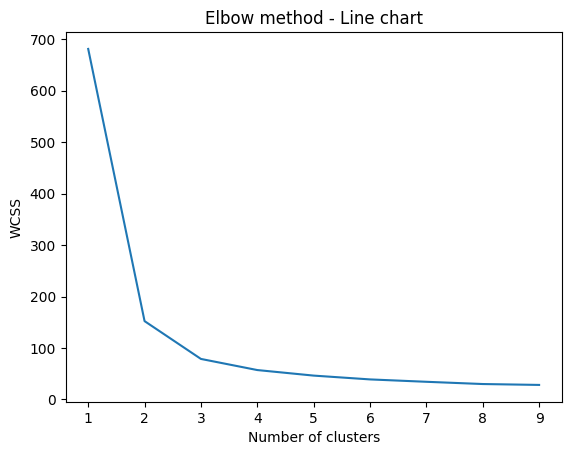

In [9]:
#Run this cell
plt.plot(range(1, 10), wcss) #Specify for which values of k you want to try
plt.title('Elbow method - Line chart')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

#### 1.6 Based on the videos, what can you infer from the elbow graph created? what should be a good value of k (number of clusters)? [0.5 pt]

After k=3, the WCSS begins to flatten, so k=3 is a good value for the number of clusters we should be using.




# Part 2: Neural Networks


For this section, we will be working with the CIFAR-10 dataset.

The CIFAR-10 dataset consists of 32x32 color images, with the 10 classes below:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck


The cells below will load and visualize the data for you.

In [10]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

**Note**: The datset might take ~5 mins to load

In [11]:
# Load the CIFAR dataset
cifar = fetch_openml('cifar_10_small', version=1)
X, y = cifar.data, cifar.target

print(X.shape)
print(y.shape)

(20000, 3072)
(20000,)


In [12]:
# Convert input features and labels to NumPy arrays so that data "plays nice" with libraries
X = np.array(X)
y = np.array(y)

The cell below visualizes the images.

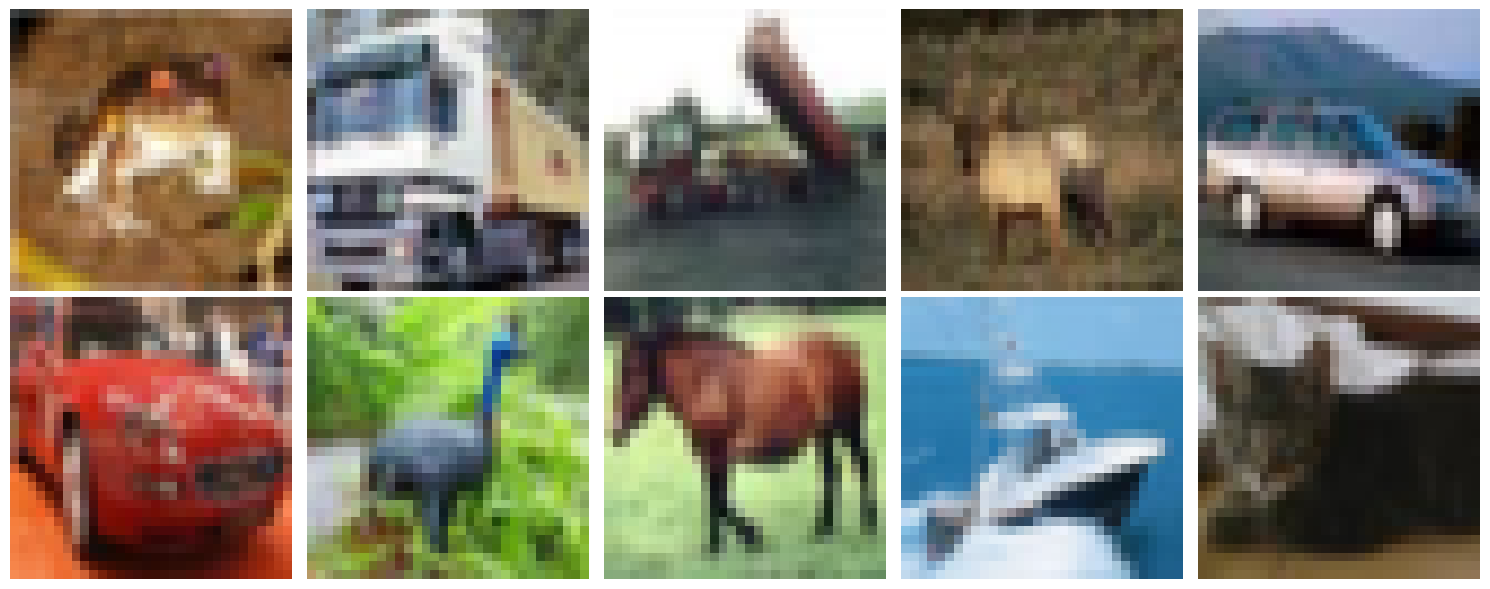

In [13]:
def visualize_images(X, y, num_rows=2, num_cols=5):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))

    # Plot each image
    for i, ax in enumerate(axes.ravel()):
        if i < len(X):

            # Creating the image
            img = np.stack([X[i].reshape(3,32, 32)[0], X[i].reshape(3,32, 32)[1], X[i].reshape(3,32, 32)[2]], axis=2)

            # Display the image
            ax.imshow(img)
            label = str(int(float(y[i])))

            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize first 10 images
visualize_images(X, y)

#### 2.1 Split the data into training and testing sets. [0.5 pts]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### 2.2 Scale the data using a StandardScaler. [0.5 pts]

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 2.3 Initialize and train an MLPClassifier model. [2 pts]

Use the following hyperparameters:
* Hidden layer sizes: 256, 128, 64
* Maximum iterations: 50

Set verbose=True when creating the MLPClassifier to see which iteration of training it is on.
This may take around 5 minutes to run.

In [16]:
mlp = MLPClassifier(hidden_layer_sizes=(256, 128, 64), max_iter=50, verbose=True)
mlp.fit(X_train, y_train)

Iteration 1, loss = 1.86038286
Iteration 2, loss = 1.58095774
Iteration 3, loss = 1.43780428
Iteration 4, loss = 1.32699495
Iteration 5, loss = 1.21376265
Iteration 6, loss = 1.10539788
Iteration 7, loss = 1.02444135
Iteration 8, loss = 0.93336180
Iteration 9, loss = 0.83571098
Iteration 10, loss = 0.77344076
Iteration 11, loss = 0.67689438
Iteration 12, loss = 0.62450749
Iteration 13, loss = 0.54724980
Iteration 14, loss = 0.48213354
Iteration 15, loss = 0.42793738
Iteration 16, loss = 0.40748142
Iteration 17, loss = 0.37537031
Iteration 18, loss = 0.31850142
Iteration 19, loss = 0.29964826
Iteration 20, loss = 0.25698034
Iteration 21, loss = 0.21841996
Iteration 22, loss = 0.20383286
Iteration 23, loss = 0.18727396
Iteration 24, loss = 0.18543719
Iteration 25, loss = 0.18025732
Iteration 26, loss = 0.15483865
Iteration 27, loss = 0.17511398
Iteration 28, loss = 0.16782940
Iteration 29, loss = 0.17091195
Iteration 30, loss = 0.17001827
Iteration 31, loss = 0.15819904
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(256, 128, 64), max_iter=50, verbose=True)

#### 2.4 Evaluate and print the the accuracy of the model. [1 pt]

In [17]:
y_pred = mlp.predict(X_test)
accuracy = mlp.score(X_test, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.4515


# Part 3: Video (Optional)

Tune the hyperparameters of your Multi-layer Perceptron classifier to improve your accuracy from part 2.4. Describe your strategy for doing so.

LINK TO VIDEO HERE: